# Flipkart Customer Support Data Analysis

##### **Project Type**    - EDA/Classification/supervised
##### **Contribution**    - Individual

# **Project Summary -**

#### Objective:
The primary goal of this project is to analyze customer feedback to identify the key factors influencing customer satisfaction and to build a machine learning model that predicts Customer Satisfaction (CSAT) scores. This enables Flipkart to proactively address service issues, enhance customer experience, and improve overall satisfaction levels.

#### Dataset Overview:
The dataset consists of customer reviews, and CSAT labels, along with other relevant data. Initial exploration revealed class imbalance in CSAT scores (e.g., more "Satisfied" responses than "Unsatisfied"), noisy text data, and redundant columns, which were addressed during preprocessing.

#### Data Cleaning and Preprocessing:
Removed null values, duplicates, and irrelevant columns.
Processed customer review text using NLP techniques: Sentiment Analysis.

#### Exploratory Data Analysis (EDA):
Identified common keywords and sentiment trends in positive vs. negative reviews.
Performed frequency analysis on words associated with low CSAT scores.
Detected patterns in CSAT distribution across different product categories and shifts.

#### Hypothesis Testing:
To explore whether CSAT scores varied across operational factors like agent shifts, a hypothesis test was conducted:
Null Hypothesis (H₀): There is no significant difference in average CSAT scores across different agent shifts.
Alternative Hypothesis (H₁): At least one agent shift has a significantly different average CSAT score.
Statistical Test Used: One-Way ANOVA (suitable for comparing means across more than two independent groups).
The ANOVA test provided insights into whether certain shifts were associated with lower or higher customer satisfaction, offering actionable suggestions for operations improvement.

#### Model Development:
Three models were built and compared:
Logistic Regression
Random Forest Classifier
XGBoost Classifier

XGBoost outperformed the others in terms of accuracy and robustness. The model was trained on the TF-IDF vectorized data with class balancing techniques applied where needed.

#### Model Evaluation Metrics:
Accuracy: Measured the percentage of correctly predicted CSAT scores.
Precision: Checked how many predicted "Satisfied" scores were actually correct.
Recall: Evaluated the model’s ability to identify all "Satisfied" instances.
F1-Score: Used as the main metric due to class imbalance.

The final model achieved around 71% accuracy, with balanced precision and recall, making it reliable for real-world deployment.

#### Insights and Business Impact:

Negative reviews with low CSAT often mentioned delivery delays, poor packaging, and lack of resolution.
High-CSAT reviews focused on fast delivery, product quality, and customer support.
The model can be used in a real-time feedback loop to flag unsatisfied customers early for service recovery.

# **GitHub Link -**

# **Problem Statement**

## ***1. Know Your Data***

### Importing Required Libraries

In [412]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [415]:
data=pd.read_csv(r"D:\Labmentix\Flipkart\Customer_support_data.csv")

### Dataset First View

In [418]:
data.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [421]:
data.shape

(85907, 20)

### Dataset Information

In [424]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [427]:
data.duplicated().sum()

0

#### Missing Values/Null Values

In [430]:
data.isnull().sum()

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

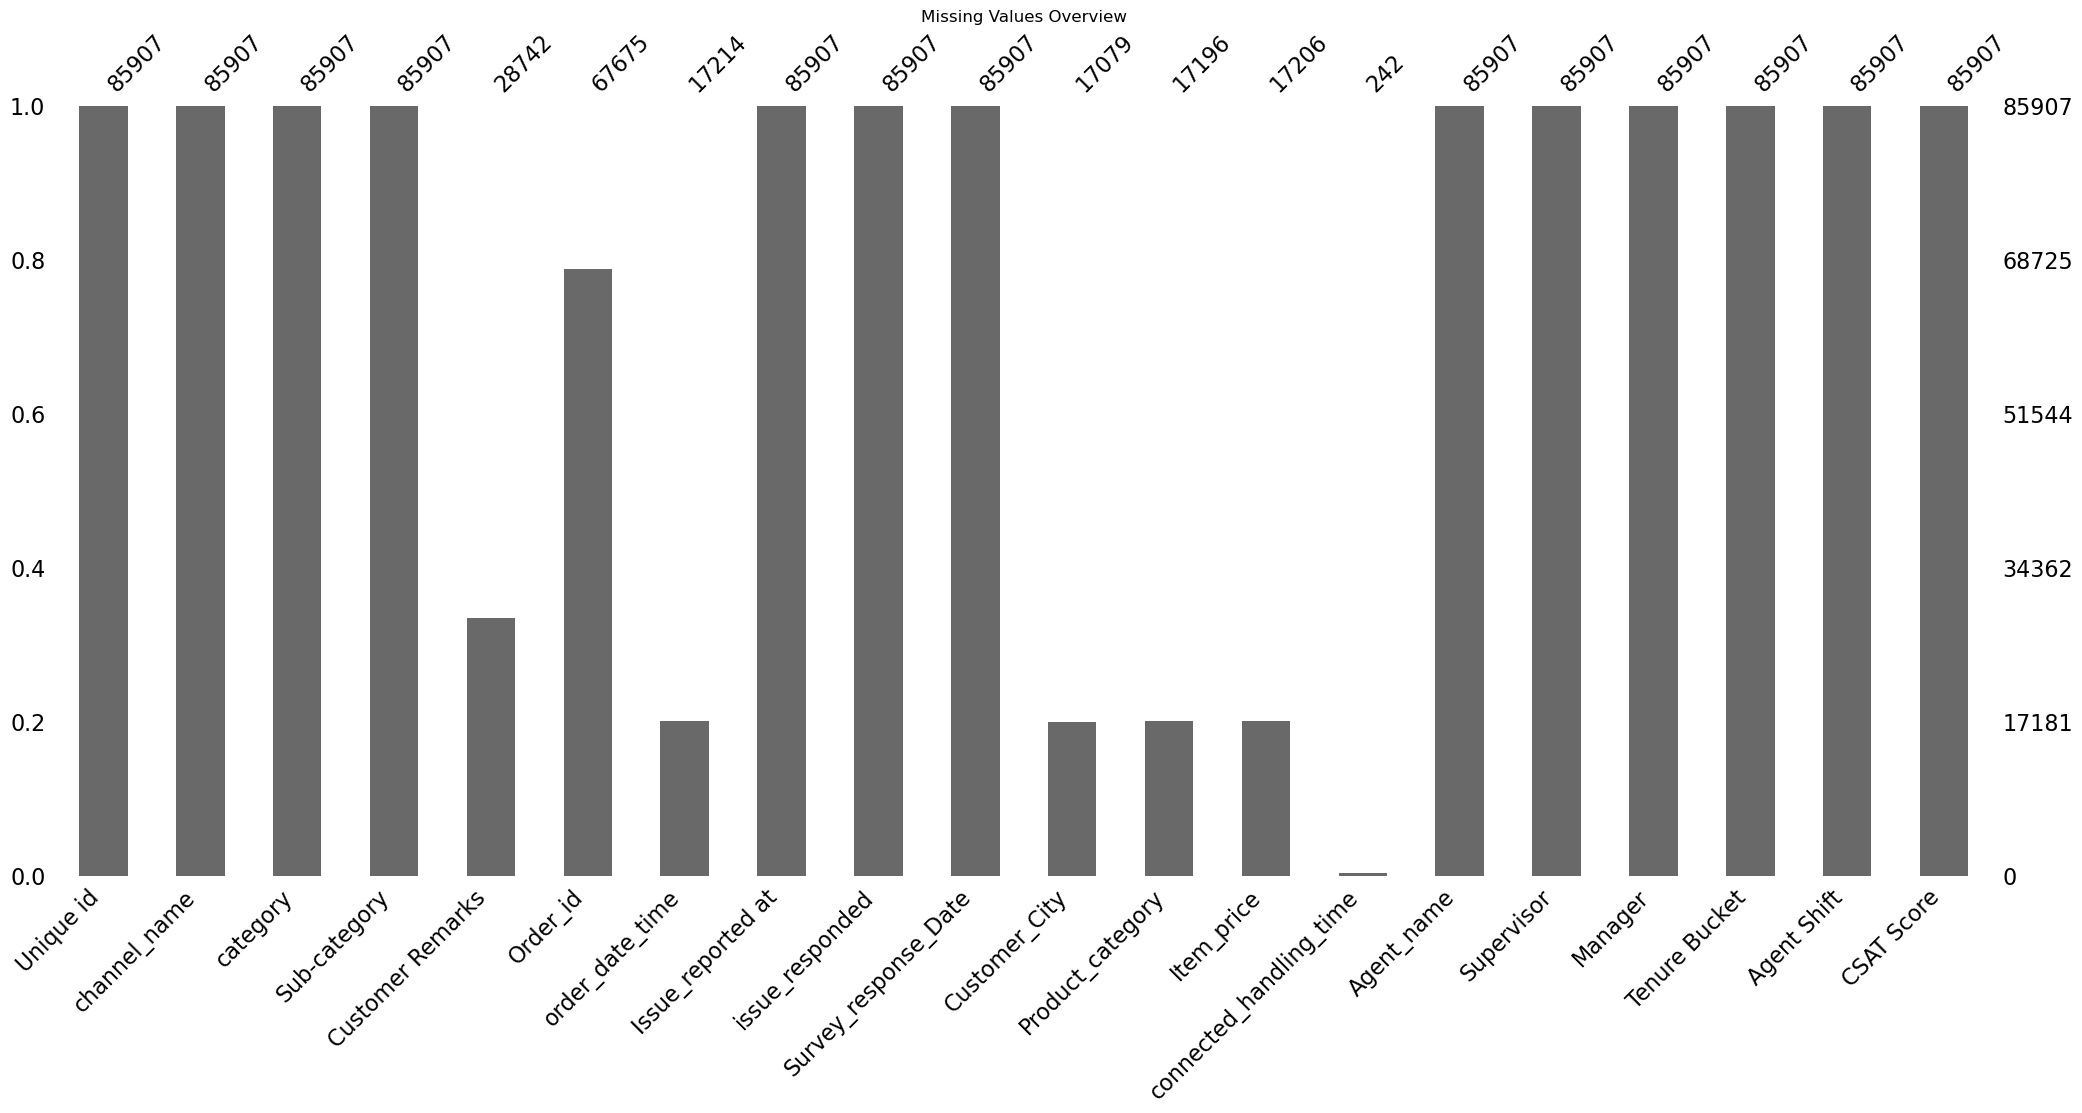

In [432]:
import missingno as msno

msno.bar(data)
plt.title("Missing Values Overview")
plt.show()


### Why did i pick the above chart?
- I used the `missingno.bar()` chart because it gives a quick overview of missing data in each column.
- It helps in understanding which features need imputation or removal.

### What are the insight(s) found from the chart?
- Several columns have a very high number of missing values, especially:
  Customer_City, Product_category, Item_price, and connected_handling_time — each missing in over 68,000 to 85,000 rows.
- Customer Remarks is also missing in more than 57,000 rows.
- order_date_time and Order_id are significantly affected too.
- Critical fields like Agent_name, Supervisor, Manager, Agent Shift, and CSAT Score have no missing values, which is a positive    sign for building performance-related insights.

### Will the gained insights help create a positive business impact?
- Yes. Identifying and handling missing values ensures model accuracy and business reliability.
- If missing values are ignored, they can introduce bias or errors in the prediction model.


### What did you know about your dataset?

The dataset contains customer service and support data from Flipkart, including order information, agent performance, and customer satisfaction scores (CSAT). It has a mix of categorical, numerical, and date/time features. Several important columns have missing values, which need to be addressed for accurate analysis. The data can help understand factors affecting customer satisfaction and improve support operations.

## ***2. Understanding the Variables***

In [436]:
data.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [437]:
data.describe(include='all')

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
count,85907,85907,85907,85907,28742,67675,17214,85907,85907,85907,17079,17196,17206.000000,242.000000,85907,85907,85907,85907,85907,85907.000000
unique,85907,3,12,57,18231,67675,13766,30923,30262,31,1782,9,NaN,NaN,1371,40,6,5,5,NaN
top,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Inbound,Returns,Reverse Pickup Enquiry,Good,c27c9bb4-fa36-4140-9f1f-21009254ffdb,09/08/2023 11:55,15/08/2023 10:59,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,NaN,NaN,Wendy Taylor,Carter Park,John Smith,>90,Morning,NaN
freq,1,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,NaN,NaN,429,4273,25261,30660,41426,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5660.774846,462.400826,NaN,NaN,NaN,NaN,NaN,4.242157
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12825.728411,246.295037,NaN,NaN,NaN,NaN,NaN,1.378903
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.000000,293.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.000000,427.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2699.750000,592.250000,NaN,NaN,NaN,NaN,NaN,5.000000


### Variables Description

The dataset contains key details about customer orders, support interactions, and agent performance. It includes identifiers like Unique id and Order_id, product-related fields such as category and Item_price, and timestamps to track order and issue timelines. Customer satisfaction is measured by the CSAT Score. Agent-related details like Agent_name, Supervisor, and Tenure Bucket help analyze service quality. Overall, these variables enable comprehensive analysis of customer experience and operational efficiency.

### Check Unique Values for each variable.

In [440]:
for i in data.columns:
    unique_values = data[i].nunique()
    print(f"{i}: {unique_values} unique values")

Unique id: 85907 unique values
channel_name: 3 unique values
category: 12 unique values
Sub-category: 57 unique values
Customer Remarks: 18231 unique values
Order_id: 67675 unique values
order_date_time: 13766 unique values
Issue_reported at: 30923 unique values
issue_responded: 30262 unique values
Survey_response_Date: 31 unique values
Customer_City: 1782 unique values
Product_category: 9 unique values
Item_price: 2789 unique values
connected_handling_time: 211 unique values
Agent_name: 1371 unique values
Supervisor: 40 unique values
Manager: 6 unique values
Tenure Bucket: 5 unique values
Agent Shift: 5 unique values
CSAT Score: 5 unique values


## 3. ***Data Wrangling***

### Dropping below columns:

Unique id,Order_id- Unique identifiers, not useful for analysis
Customer_City,connected_handling_time,Item_price,order_date_time-Too many missing values,not usable.
Product_category-It may not impact goal

In [445]:
data.drop(columns=["Unique id","Customer_City","connected_handling_time","Item_price","Product_category","order_date_time","Order_id"],inplace=True)

#### Checking for Duplicates After Cleaning

In [450]:
data.duplicated().sum()

9

In [452]:
data.drop_duplicates(inplace=True)

In [454]:
data.isnull().sum()

channel_name                0
category                    0
Sub-category                0
Customer Remarks        57156
Issue_reported at           0
issue_responded             0
Survey_response_Date        0
Agent_name                  0
Supervisor                  0
Manager                     0
Tenure Bucket               0
Agent Shift                 0
CSAT Score                  0
dtype: int64

In [456]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85898 entries, 0 to 85906
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   channel_name          85898 non-null  object
 1   category              85898 non-null  object
 2   Sub-category          85898 non-null  object
 3   Customer Remarks      28742 non-null  object
 4   Issue_reported at     85898 non-null  object
 5   issue_responded       85898 non-null  object
 6   Survey_response_Date  85898 non-null  object
 7   Agent_name            85898 non-null  object
 8   Supervisor            85898 non-null  object
 9   Manager               85898 non-null  object
 10  Tenure Bucket         85898 non-null  object
 11  Agent Shift           85898 non-null  object
 12  CSAT Score            85898 non-null  int64 
dtypes: int64(1), object(12)
memory usage: 9.2+ MB


### What all manipulations have you done and insights you found?

Unnecessary Columns Removed: Dropped unique IDs and columns with too many missing values.
Data Cleaned:Removed duplicates; now 85,898 clean records remain.
Target Column (CSAT Score):Already in integer format and ready for analysis.

Next Suggestions:
Explore target variable distribution.
Encode categorical variables.
Create new features 
Split data for modeling.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### U - Univariate Analysis 

#### 1. Channel Distribution

<Axes: xlabel='channel_name', ylabel='count'>

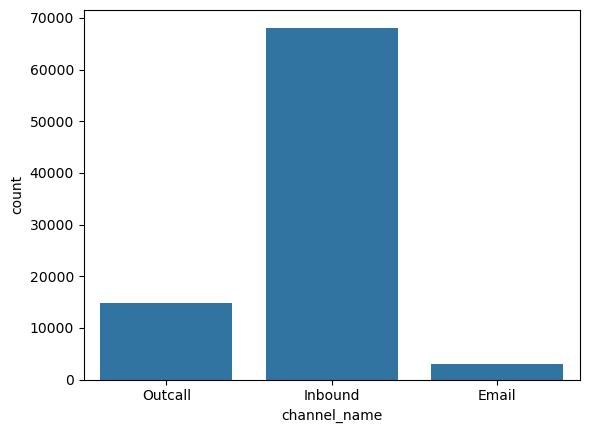

In [462]:
sns.countplot(data=data,x="channel_name")

### Why did i pick the above chart?
A countplot is for visualizing the frequency of categories in a single categorical column.
In this case, it clearly shows how many customer issues were raised through each channel (like Inbound, Outbound, etc.).
It helps identify the most commonly used support channel.

### What are the insight(s) found from the chart?
The Inbound channel has the highest volume of tickets, meaning customers prefer calling in or using that channel to raise issues.
Other channels are less frequently used, possibly due to lower awareness or accessibility.

### Will the gained insights help create a positive business impact?
Yes, the insight supports positive growth:
You can optimize resources for the most-used channel (Inbound), such as assigning more agents or improving call-handling systems.
You can promote other channels (like chat or email) for better load distribution and faster resolution times.

#### 2. Category of Issues

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Returns'),
  Text(1, 0, 'Order Related'),
  Text(2, 0, 'Refund Related'),
  Text(3, 0, 'Product Queries'),
  Text(4, 0, 'Shopzilla Related'),
  Text(5, 0, 'Payments related'),
  Text(6, 0, 'Feedback'),
  Text(7, 0, 'Cancellation'),
  Text(8, 0, 'Offers & Cashback'),
  Text(9, 0, 'Others'),
  Text(10, 0, 'App/website'),
  Text(11, 0, 'Onboarding related')])

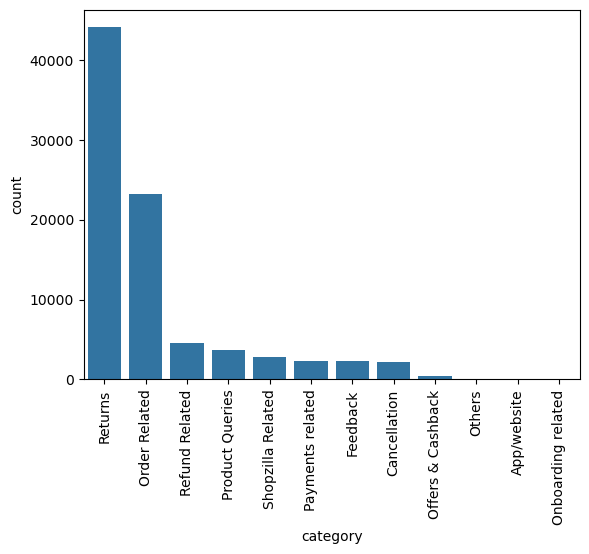

In [466]:
#plt.figure(figsize=(20,10))
sns.countplot(data=data, x="category", order=data['category'].value_counts().index)
plt.xticks(rotation=90)

### Why did i pick the above chart?
To understand the distribution of issues across different categories.

### What are the insight(s) found from the chart?
Most issues are related to Returns, followed by Delivery and Payment concerns.

### Will the gained insights help create a positive business impact?
Yes. Prioritizing improvements in top issue categories (like Returns) can enhance customer satisfaction and reduce complaints.

#### 3. Sub-category Distribution

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Reverse Pickup Enquiry'),
  Text(1, 0, 'Return request'),
  Text(2, 0, 'Delayed'),
  Text(3, 0, 'Order status enquiry'),
  Text(4, 0, 'Installation/demo'),
  Text(5, 0, 'Fraudulent User'),
  Text(6, 0, 'Product Specific Information'),
  Text(7, 0, 'Refund Enquiry'),
  Text(8, 0, 'Wrong'),
  Text(9, 0, 'Missing')])

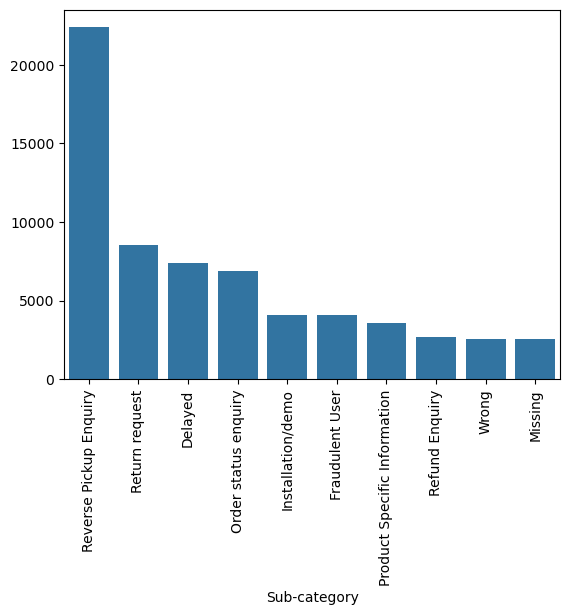

In [470]:
top_subcats = data['Sub-category'].value_counts().nlargest(10)
sns.barplot(x=top_subcats.index, y=top_subcats.values)
plt.xticks(rotation=90)

### Why did i pick the above chart?
To identify which sub-categories receive the highest number of customer issues.

### What are the insight(s) found from the chart?
Reverse Pickup Enquiry, Delayed Refund, and Return Pickup are the top sub-categories with the most issues.

### Will the gained insights help create a positive business impact?
Yes. Focusing on these key problem areas can help optimize operations, improve processes, and boost customer satisfaction.

#### 4. Agent Shift Distribution

<Axes: xlabel='Agent Shift', ylabel='count'>

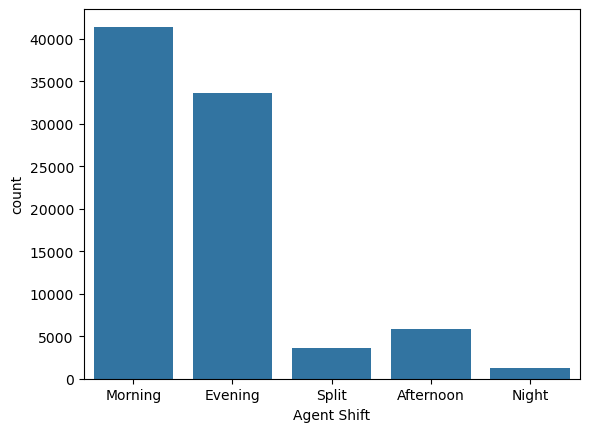

In [474]:
sns.countplot(data=data, x="Agent Shift")

### Why did i pick the above chart?
To analyze issue distribution across different agent shifts.

### What are the insight(s) found from the chart?
The Morning shift handles the highest number of cases, followed by Evening and Night

### Will the gained insights help create a positive business impact?
Yes. Resource allocation and staffing strategies can be optimized based on shift-wise issue volume.

#### 5. CSAT Score Distribution

<Axes: xlabel='CSAT Score', ylabel='Count'>

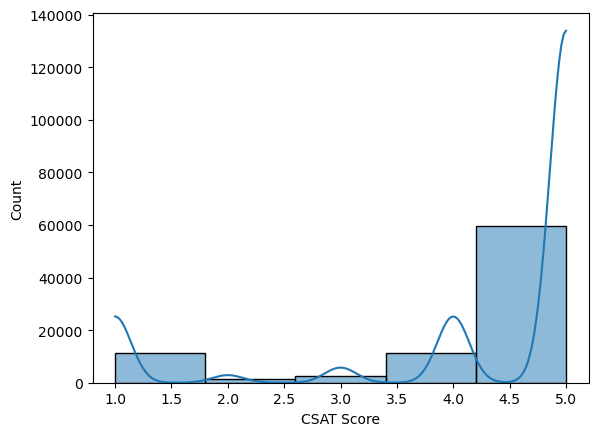

In [477]:
sns.histplot(data['CSAT Score'], bins=5, kde=True)

### Why did i pick the above chart?
To understand the overall customer satisfaction score distribution.

### What are the insight(s) found from the chart?
Most customers gave high CSAT scores (4 and 5), indicating generally good satisfaction..

### Will the gained insights help create a positive business impact?
Yes. It highlights areas of success and reinforces continuing current service practices while identifying room for improvement in lower scores.

### B - Bivariate Analysis 

#### Categorical vs Categorical:

#### 6. Channel vs CSAT Score

<Axes: xlabel='channel_name', ylabel='CSAT Score'>

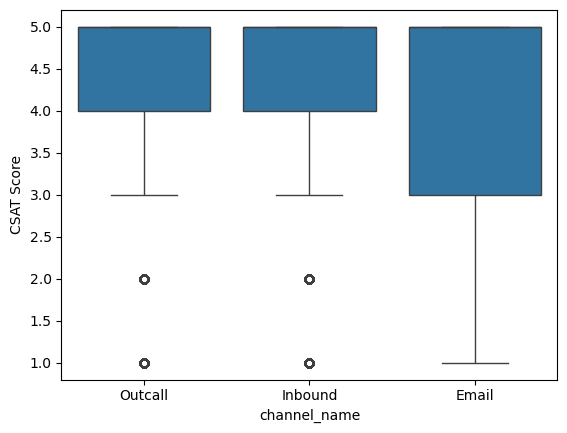

In [483]:
sns.boxplot(data=data, x="channel_name", y="CSAT Score")

### Why did i pick the above chart?
To compare customer satisfaction across different sales channels.

### What are the insight(s) found from the chart?
CSAT scores vary by channel; one channel may show higher median satisfaction than others.

### Will the gained insights help create a positive business impact?
Yes. It helps identify strong and weak channels to focus improvement efforts for better customer experience.

#### 7. Category vs CSAT Score

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Product Queries'),
  Text(1, 0, 'Order Related'),
  Text(2, 0, 'Returns'),
  Text(3, 0, 'Cancellation'),
  Text(4, 0, 'Shopzilla Related'),
  Text(5, 0, 'Payments related'),
  Text(6, 0, 'Refund Related'),
  Text(7, 0, 'Feedback'),
  Text(8, 0, 'Offers & Cashback'),
  Text(9, 0, 'Onboarding related'),
  Text(10, 0, 'Others'),
  Text(11, 0, 'App/website')])

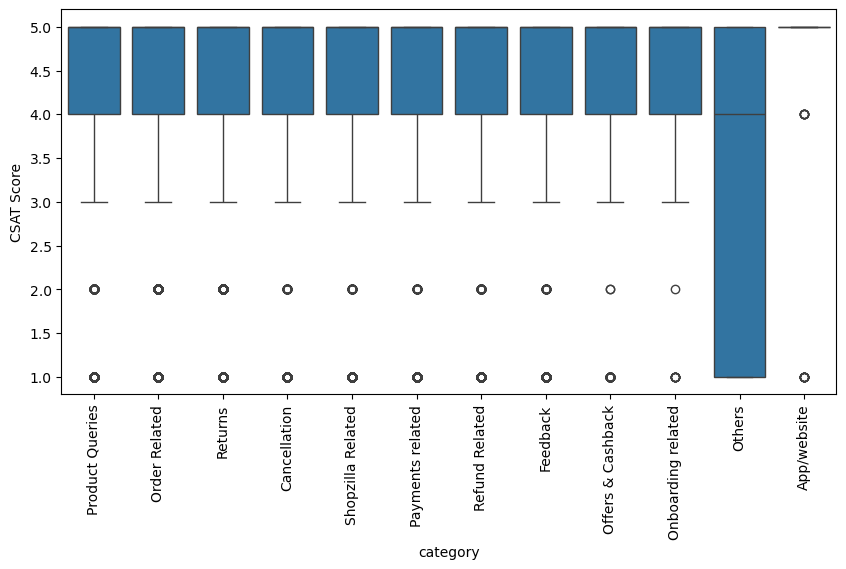

In [486]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x="category", y="CSAT Score")
plt.xticks(rotation=90)

### Why did i pick the above chart?
To analyze customer satisfaction differences across product categories.

### What are the insight(s) found from the chart?
Some categories have higher median CSAT scores, while others show more variability and lower satisfaction.

### Will the gained insights help create a positive business impact?
Yes. It helps prioritize categories needing quality or service improvements to boost customer satisfaction.

#### 8. Tenure Bucket vs CSAT Score

<Axes: xlabel='Tenure Bucket', ylabel='CSAT Score'>

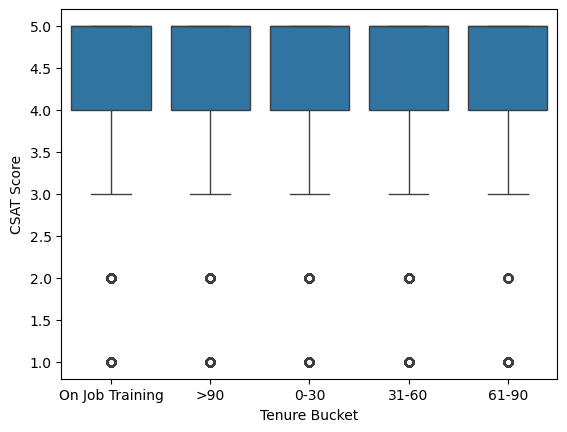

In [489]:
sns.boxplot(data=data, x="Tenure Bucket", y="CSAT Score")

### Why did i pick the above chart?
To see how agent tenure impacts customer satisfaction scores.

### What are the insight(s) found from the chart?
CSAT scores vary across tenure buckets; more experienced agents might have higher median satisfaction.

### Will the gained insights help create a positive business impact?
Yes. It highlights the importance of experienced agents and supports targeted training or staffing decisions.

#### Numerical vs Categorical

#### 9. CSAT Score vs Agent Shift

<Axes: xlabel='Agent Shift', ylabel='CSAT Score'>

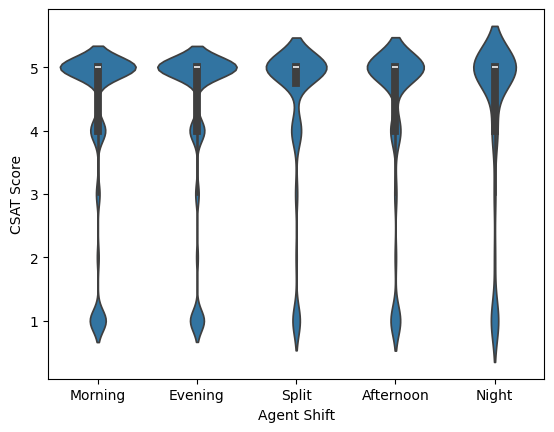

In [493]:
sns.violinplot(data=data, x="Agent Shift", y="CSAT Score")

### Why did i pick the above chart?
To understand the distribution of customer satisfaction scores across different agent shifts.

### What are the insight(s) found from the chart?
CSAT scores show variation by shift, with some shifts having wider score distributions and others more consistent.

### Will the gained insights help create a positive business impact?
Yes. It can help optimize shift scheduling to improve customer satisfaction during key times.

### M - Multivariate Analysis 

#### 10. Agent Shift vs Tenure vs CSAT

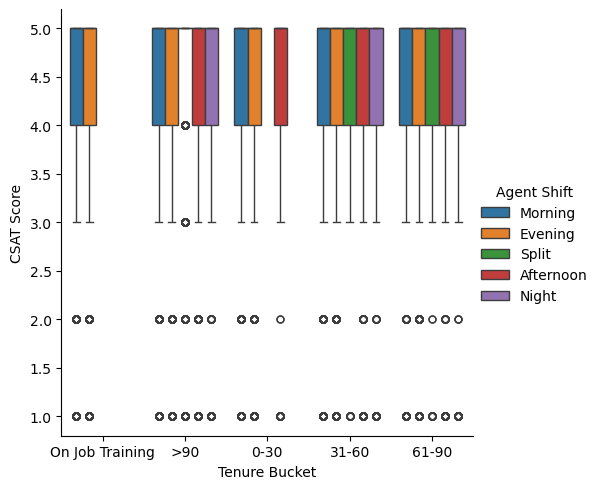

In [497]:
sns.catplot(data=data, x="Tenure Bucket", y="CSAT Score", hue="Agent Shift", kind="box")

### Why did i pick the above chart?
To explore how tenure and shift together impact customer satisfaction.

### What are the insight(s) found from the chart?
CSAT scores differ across tenure buckets and shifts, showing interaction effects on satisfaction levels.

### Will the gained insights help create a positive business impact?
Yes. It helps in designing better workforce management by considering both experience and shift timing.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

Null Hypothesis (H₀): There is no significant difference in the average CSAT Score across different Agent Shifts.

Alternate Hypothesis (H₁): At least one Agent Shift has a significantly different average CSAT Score.

In [501]:
data["Agent Shift"].unique()

array(['Morning', 'Evening', 'Split', 'Afternoon', 'Night'], dtype=object)

In [502]:
from scipy.stats import f_oneway

morning = data[data["Agent Shift"] == "Morning"]["CSAT Score"].dropna()
afternoon = data[data["Agent Shift"] == "Afternoon"]["CSAT Score"].dropna()
evening = data[data["Agent Shift"] == "Evening"]["CSAT Score"].dropna()
split = data[data["Agent Shift"] == "Split"]["CSAT Score"].dropna()
night = data[data["Agent Shift"] == "Night"]["CSAT Score"].dropna()

f_stat, p_val = f_oneway(morning, afternoon, evening, split, night)

print(f"F_statistic: {f_stat}, p_val: {p_val}")


F_statistic: 39.01772857841491, p_val: 1.0900035551567907e-32


#### Test used: 
One-way ANOVA (f_oneway from scipy.stats)
#### Why did you choose the specific statistical test?
Comparing the means of CSAT Scores across more than two independent groups (Agent Shifts: Morning, Afternoon, Evening, Split, Night). One-way ANOVA is the appropriate test when checking for differences in means between multiple independent groups.
#### Conclusion:
F-statistic: 39.02,p-value: 1.09e-32 (very small)
Since the p-value is far less than 0.05, we reject the null hypothesis.
There is a statistically significant difference in average CSAT Scores across different Agent Shifts.

### Hypothetical Statement - 2

Null Hypothesis (H0):
There is no significant difference in average CSAT Scores across different Tenure Buckets.

Alternate Hypothesis (H1):
At least one Tenure Bucket has a significantly different average CSAT Score compared to others.

In [505]:
from scipy.stats import f_oneway

tenure_groups = data['Tenure Bucket'].unique()

csat_groups = [data[data['Tenure Bucket'] == x]['CSAT Score'].dropna() for x in tenure_groups]

f_stat, p_val = f_oneway(*csat_groups)
print(f"F-statistic: {f_stat}, p-value: {p_val}")


F-statistic: 50.010763041671694, p-value: 4.122137134816358e-42


#### Test used: 
One-way ANOVA (f_oneway from scipy.stats)
#### Why did you choose the specific statistical test?
One-way ANOVA is ideal for comparing the means of a numerical variable (CSAT Score) across multiple independent groups (Tenure Buckets). It checks if any group mean differs significantly from others.
#### Conclusion:
F-statistic = 50.01 is quite high, indicating strong variation between group means.
p-value = 4.12e-42 (very close to zero) is much less than the significance level of 0.05.
We reject the null hypothesis (H0). This means there is a statistically significant difference in the average CSAT Scores across different Tenure Buckets.

### Hypothetical Statement - 3

Null hypothesis (H0): The average CSAT Score is the same across all channel_name groups.

Alternate hypothesis (H1): At least one channel_name group has a different average CSAT Score.

In [508]:
from scipy.stats import f_oneway

channels = data['channel_name'].unique()
groups = [data[data['channel_name'] == ch]['CSAT Score'].dropna() for ch in channels]

f_stat, p_val = f_oneway(*groups)

print(f"F-statistic: {f_stat}, p-value: {p_val}")


F-statistic: 97.29822225347993, p-value: 6.190314385047939e-43


#### Test used: 
One-way ANOVA (f_oneway from scipy.stats)
#### Why did you choose the specific statistical test?
We compare means of CSAT Score (numerical) across more than two independent groups (channel_name categories).
#### Conclusion:
F-statistic: 97.29
p-value: 6.19e-43 
There is a statistically significant difference in the average CSAT Scores across the different channel_name groups.
This means that the channel through which customers interact does affect their satisfaction scores.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [522]:
data.isna().sum()

channel_name                0
category                    0
Sub-category                0
Customer Remarks        57156
Issue_reported at           0
issue_responded             0
Survey_response_Date        0
Agent_name                  0
Supervisor                  0
Manager                     0
Tenure Bucket               0
Agent Shift                 0
CSAT Score                  0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

I used imputation with an empty string ("") for the Customer Remarks column because it is a text field. This avoids losing data by dropping rows with missing remarks and allows performing sentiment analysis on all records.

In [525]:
data["Customer Remarks"]=data["Customer Remarks"].fillna("")

### 2. Handling Outliers

In [528]:
num_col=data.select_dtypes(include=["int","float"])
print(len(num_col.columns))
print(num_col.columns)

1
Index(['CSAT Score'], dtype='object')


##### Since the dataset contains only two numerical columns: CSAT Score (between 1 and 5) and Customer Remarks Sentiment (polarity score ranging from -1 to +1) both variables are naturally limited in their value ranges. Therefore, no outlier treatment was necessary as there were no extreme or invalid values that could distort the analysis.

### 3. Categorical Encoding

#### Ordinal Encoding for Tenure Bucket

In [533]:
from sklearn.preprocessing import OrdinalEncoder

order=[["On Job Training","0-30","31-60","61-90",">90"]]
encoder = OrdinalEncoder(categories=order)
data[["Tenure Bucket"]]=encoder.fit_transform(data[["Tenure Bucket"]])

##### Why this technique?
To retain the order and convert it into numerical form for model compatibility.

#### Frequency Encoding for High-Cardinality Categorical Columns

In [537]:
freq_encoding=data["Agent_name"].value_counts()/len(data)
data["Agent_name_freq"]=data["Agent_name"].map(freq_encoding)

freq_encoding=data["Supervisor"].value_counts()/len(data)
data["Supervisor_freq"]=data["Supervisor"].map(freq_encoding)

freq_encoding=data["Manager"].value_counts()/len(data)
data["Manager_freq"]=data["Manager"].map(freq_encoding)

freq_enc = data["Sub-category"].value_counts(normalize=True)
data["sub_cat_freq"]=data["Sub-category"].map(freq_enc)

data.drop(columns=["Agent_name",'Supervisor',"Manager","Sub-category"],inplace=True)

##### Why this technique?
A high-cardinality categorical columns:
Agent_name
Supervisor
Manager
Sub-category

**Instead of creating a separate column for each unique value, frequency encoding replaces each value with how often it appears in the dataset.

#### One-Hot Encoding for category Column by handling Rare Categories

In [541]:
category_counts=data["category"].value_counts()
rare=category_counts[category_counts<500].index
data['category'] = data['category'].replace(rare,"Others")

data=pd.get_dummies(data,columns=["category"],drop_first=True)

##### Why this technique?
The "category" column is nominal, so one-hot encoding is appropriate to convert it into binary variables for ML models.

#### One-Hot Encoding for Agent Shift and channel_name Columns

In [545]:
data = pd.get_dummies(data, columns=["Agent Shift","channel_name"],drop_first=True)

##### Why this technique?
These columns have no inherent order, making one-hot encoding the most suitable choice for transforming them into numeric format for machine learning models.

### 4. Textual Data Preprocessing

In [549]:
from textblob import TextBlob

data["Cus_Remarks_Sentiment"]=data["Customer Remarks"].apply(lambda x:TextBlob(x).sentiment.polarity)

data.drop(columns=["Customer Remarks"],inplace=True)

#### Why this technique?

Text data cannot be imputed with numerical measures like mean or median.
Filling missing remarks with empty strings ensures the sentiment analysis function runs without errors.
It maintains dataset size and integrity, keeping all available data for analysis.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

##### Convert Columns to Datetime and Calculate Response Time in Minutes

In [554]:
data["Issue_reported at"]=pd.to_datetime(data["Issue_reported at"],dayfirst=True)
data["issue_responded"]=pd.to_datetime(data["issue_responded"],dayfirst=True)

data["Response time(min)"]=(data["issue_responded"]-data["Issue_reported at"]).dt.total_seconds()/60
data.drop(columns=['Issue_reported at', 'issue_responded'], inplace=True)

#### 2. Feature Selection

##### Dropping Irrelevant Column Survey_response_Date

In [559]:
# this column does not add value to predict CSAT score . so dropping it.
data.drop(columns=["Survey_response_Date"],inplace=True)

### Correlation with Target Variable (CSAT Score)

In [562]:
corr_matrix=data.corr()
correlation=corr_matrix["CSAT Score"].sort_values(ascending=False)
print(correlation)

CSAT Score                    1.000000
Cus_Remarks_Sentiment         0.260602
category_Returns              0.077571
Agent_name_freq               0.056915
Tenure Bucket                 0.037018
Agent Shift_Split             0.028283
Manager_freq                  0.025003
Agent Shift_Evening           0.019853
Supervisor_freq               0.013612
category_Payments related     0.013523
channel_name_Inbound          0.013008
channel_name_Outcall          0.009119
category_Shopzilla Related    0.008575
Agent Shift_Night             0.004213
category_Refund Related      -0.002636
category_Others              -0.007397
category_Feedback            -0.010032
sub_cat_freq                 -0.013945
category_Product Queries     -0.031103
Agent Shift_Morning          -0.036792
category_Order Related       -0.064386
Response time(min)           -0.145124
Name: CSAT Score, dtype: float64


Strongest positive correlation:
Cus_Remarks_Sentiment (0.26) — more positive remarks relate to higher CSAT scores.

category_Returns (0.078) and Agent_name_freq (0.057) show mild positive relationships.

Features with weak correlation:
Most other features have correlations near zero, which means they have little linear relationship with CSAT score.

Negative correlations:
Response time(min) (-0.145) shows a mild negative correlation — longer response times relate to lower CSAT scores

#### Visualizing Correlation with CSAT Score

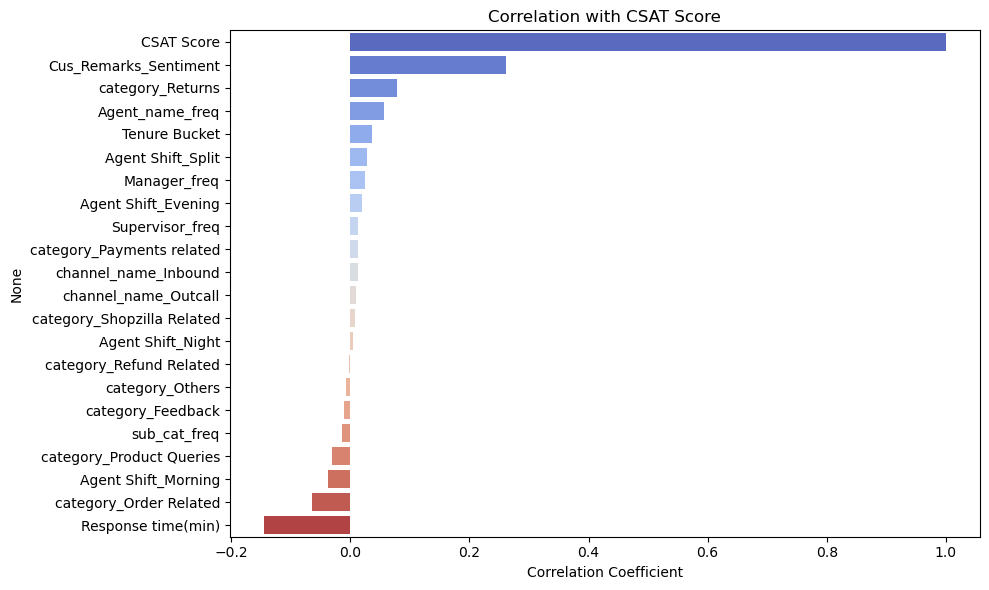

In [566]:
plt.figure(figsize=(10,6))
sns.barplot(x=correlation.values, y=correlation.index, palette='coolwarm')
plt.title("Correlation with CSAT Score")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

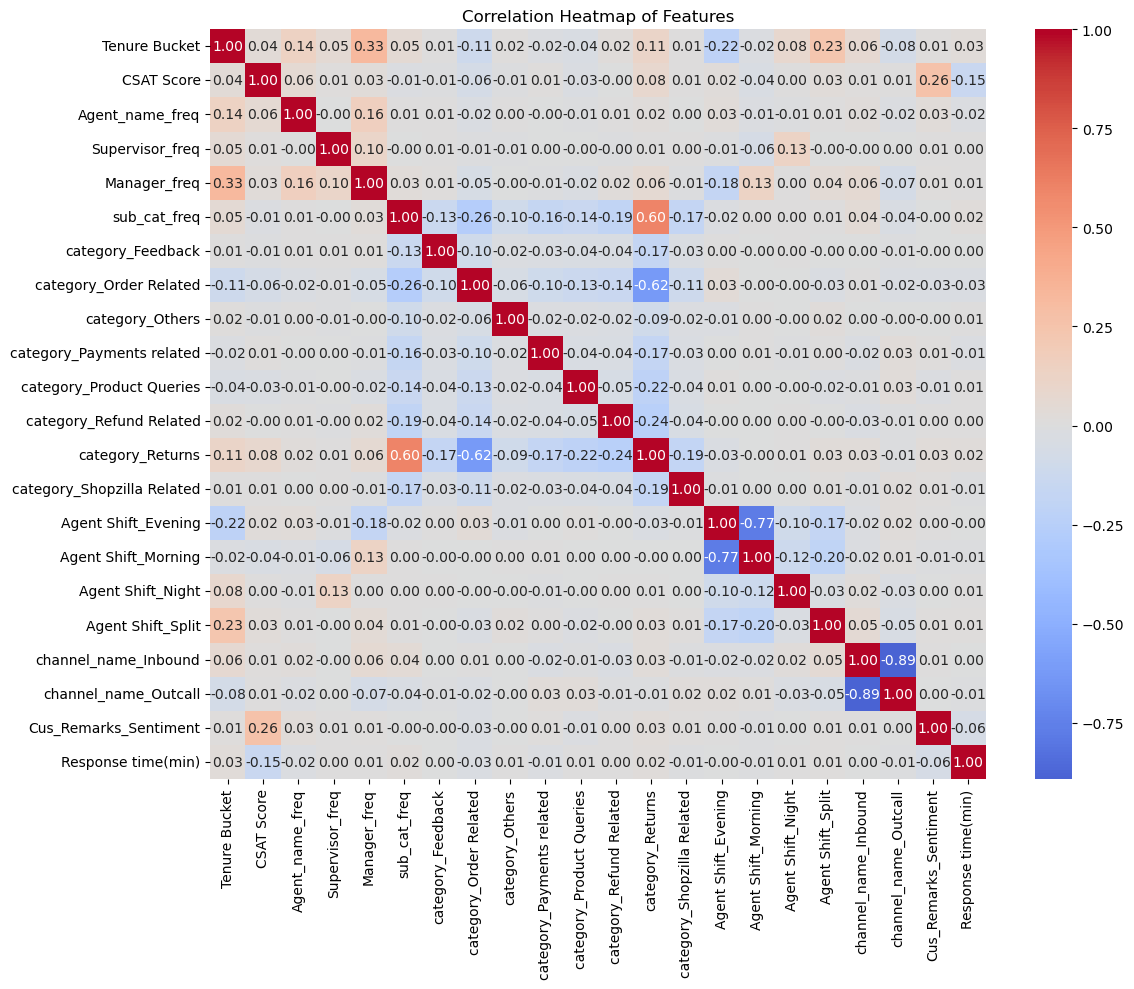

In [567]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()

#### Feature Importance by Correlation

In [570]:
selected_features=correlation[abs(correlation)>0.05].index.tolist()

if "CSAT Score" in selected_features:
    selected_features.remove("CSAT Score")
    
print("Selected features:", selected_features)

X_filtered=data[selected_features]
y=data["CSAT Score"]

Selected features: ['Cus_Remarks_Sentiment', 'category_Returns', 'Agent_name_freq', 'category_Order Related', 'Response time(min)']


#### Why this method?
 This method helps eliminate features with very low correlation

#### Feature Importance by RF Model

In [580]:
from sklearn.ensemble import RandomForestRegressor

X = data.drop(columns=["CSAT Score"])
y = data["CSAT Score"]

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

print("Feature Importances:\n")
print(importances_sorted)


Feature Importances:

Response time(min)            0.248026
Agent_name_freq               0.193645
Cus_Remarks_Sentiment         0.153855
Supervisor_freq               0.125848
sub_cat_freq                  0.081406
Manager_freq                  0.043955
Tenure Bucket                 0.036762
channel_name_Inbound          0.020967
channel_name_Outcall          0.017269
Agent Shift_Morning           0.015835
Agent Shift_Evening           0.013966
category_Order Related        0.008104
category_Returns              0.007319
category_Product Queries      0.006046
category_Refund Related       0.005819
Agent Shift_Split             0.005098
category_Shopzilla Related    0.004807
category_Feedback             0.004479
Agent Shift_Night             0.002991
category_Payments related     0.002840
category_Others               0.000965
dtype: float64


In [581]:
filtered_feature=importances[importances>=0.03].index
print(filtered_feature)
#This will keep only those features with importance ≥ 0.03 for modeling.

Index(['Tenure Bucket', 'Agent_name_freq', 'Supervisor_freq', 'Manager_freq',
       'sub_cat_freq', 'Cus_Remarks_Sentiment', 'Response time(min)'],
      dtype='object')


##### Why this method?
Random Forest is an ensemble method that naturally ranks features based on how useful they are in improving predictions. It's robust to outliers and can handle both numerical and encoded categorical features.

##### Which all features you found important and why?
The important features identified based on feature importance analysis included Tenure Bucket, agent and manager-related frequencies, sub-category frequency, sentiment polarity of customer remarks, and response time. These features were selected due to their high relevance on customer satisfaction.

In [583]:
X = data[filtered_feature]
y = data["CSAT Score"]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85898 entries, 0 to 85906
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Tenure Bucket               85898 non-null  float64
 1   CSAT Score                  85898 non-null  int64  
 2   Agent_name_freq             85898 non-null  float64
 3   Supervisor_freq             85898 non-null  float64
 4   Manager_freq                85898 non-null  float64
 5   sub_cat_freq                85898 non-null  float64
 6   category_Feedback           85898 non-null  bool   
 7   category_Order Related      85898 non-null  bool   
 8   category_Others             85898 non-null  bool   
 9   category_Payments related   85898 non-null  bool   
 10  category_Product Queries    85898 non-null  bool   
 11  category_Refund Related     85898 non-null  bool   
 12  category_Returns            85898 non-null  bool   
 13  category_Shopzilla Related  85898 no

Total entries: 85,898
Total columns: 22
Column types:
8 numeric columns (float64) — including features like Tenure Bucket, CSAT Score, Response time(min), sentiment score, and frequency encoded columns
14 boolean columns (bool) — one-hot encoded categories and agent shifts
The dataset is ready for modeling with all categorical variables converted into numeric formats and no missing values.

### 6. Data Scaling
CSAT Score (target) and Cus_Remarks_Sentiment (feature) are numeric and encoding methods produced binary variables (0/1), which don’t need scaling.

### 7. Dimesionality Reduction

Since the dataset contains only 22 columns and relevant features were already selected based on importance, dimensionality reduction was not necessary.

### 8. Data Splitting

I have used a 80:20 data splitting ratio, where:
80% of the data is used for training the model
20% of the data is used for testing the model's performance

Why 80:20?
80:20 is a commonly used split in data science projects.
It provides:
Enough data for the model to learn patterns (training set)
Sufficient data to evaluate model performance (test set)
Especially when the dataset is moderately large, this ratio ensures:
Model is trained well without overfitting, Evaluation is reliable and unbiased.

In [595]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### 9. Handling Imbalanced Dataset

In [597]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)
CSAT Score
5    59611
1    11228
4    11218
3     2558
2     1283
I used SMOTE to balance the classes by creating synthetic samples for minority classes. This helps the model learn better without overfitting.

In [600]:
print("Before resampling:\n", y.value_counts())  
print("After resampling:\n", y_resampled.value_counts())

Before resampling:
 CSAT Score
5    59611
1    11228
4    11218
3     2558
2     1283
Name: count, dtype: int64
After resampling:
 CSAT Score
4    47667
5    47667
3    47667
1    47667
2    47667
Name: count, dtype: int64


## ***7. ML Model Implementation***

### ML Model - 1

In [602]:
model=LogisticRegression()
model.fit(X_resampled, y_resampled)

y_pred=model.predict(X_test)

##### Model Used:
Logistic Regression — a simple and effective classification algorithm that predicts the probability of class membership by fitting a logistic function.

##### Why Logistic Regression?
It works well for multiclass classification problems like this and is easy to interpret.

In [604]:
print("Accuracy_score:",accuracy_score(y_test,y_pred))
print("Classification report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy_score: 0.24458672875436555
Classification report:
               precision    recall  f1-score   support

           1       0.51      0.29      0.37      2251
           2       0.02      0.27      0.04       267
           3       0.03      0.24      0.06       504
           4       0.14      0.37      0.20      2214
           5       0.87      0.21      0.34     11944

    accuracy                           0.24     17180
   macro avg       0.31      0.28      0.20     17180
weighted avg       0.69      0.24      0.31     17180

Confusion Matrix:
 [[ 657  433  520  554   87]
 [  30   72   75   71   19]
 [  50  123  121  171   39]
 [ 100  476  570  827  241]
 [ 444 2273 2406 4296 2525]]


In [609]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X_resampled,y_resampled,cv=5,scoring="accuracy")
print("Cross-validation scores:", scores)
print("Average CV Accuracy:", scores.mean())

Cross-validation scores: [0.26934777 0.27408899 0.27102608 0.26389326 0.27113097]
Average CV Accuracy: 0.2698974133048021


### ML Model - 2

In [611]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

# Train model
rf_model.fit(X_resampled, y_resampled)

# Predict on test set
y_pred = rf_model.predict(X_test)
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6338766006984866
Classification Report:
               precision    recall  f1-score   support

           1       0.39      0.34      0.36      2251
           2       0.02      0.01      0.01       267
           3       0.03      0.02      0.02       504
           4       0.14      0.09      0.11      2214
           5       0.74      0.83      0.78     11944

    accuracy                           0.63     17180
   macro avg       0.26      0.26      0.26     17180
weighted avg       0.58      0.63      0.61     17180

Confusion Matrix:
 [[ 773   12   39  169 1258]
 [  48    2    3   30  184]
 [  84    8    8   52  352]
 [ 221   26   29  198 1740]
 [ 860   81  152  942 9909]]


In [612]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(rf_model,X_resampled,y_resampled,cv=5,scoring="accuracy")
print("Cross-validation scores:", scores)
print("Average CV Accuracy:", scores.mean())

Cross-validation scores: [0.62420543 0.82923196 0.82746974 0.82986133 0.82814106]
Average CV Accuracy: 0.7877819036230516


In [614]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(max_iter=100, random_state=42)

param_grid = {
    'C': [0.01, 0.1, 1, 10],        
    'solver': ['liblinear', 'lbfgs'], 
    'penalty': ['l1', 'l2']          # Type of regularization
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_resampled, y_resampled)

best_model = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

y_pred = best_model.predict(X_test)

# Evaluate model
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score: 0.3160069848661234
Classification report:
               precision    recall  f1-score   support

           1       0.41      0.36      0.39      2251
           2       0.02      0.24      0.04       267
           3       0.03      0.18      0.05       504
           4       0.15      0.26      0.19      2214
           5       0.82      0.32      0.46     11944

    accuracy                           0.32     17180
   macro avg       0.28      0.28      0.22     17180
weighted avg       0.64      0.32      0.40     17180

Confusion matrix:
 [[ 821  378  415  370  267]
 [  50   65   58   46   48]
 [  94  118   90  110   92]
 [ 188  427  545  586  468]
 [ 841 2008 2318 2910 3867]]


In [617]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define model
dt = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid
param_dist_dt = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Randomized Search with 50 iterations
random_search_dt = RandomizedSearchCV(
    dt, param_distributions=param_dist_dt, 
    n_iter=50, cv=3, verbose=1, random_state=42, n_jobs=-1
)

# Fit model
random_search_dt.fit(X_resampled, y_resampled)

print("Best parameters for Decision Tree:", random_search_dt.best_params_)

# Predict on test set
y_pred_dt = random_search_dt.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy'}
Decision Tree Accuracy: 0.5292782305005821
Classification Report:
               precision    recall  f1-score   support

           1       0.27      0.31      0.29      2251
           2       0.03      0.04      0.03       267
           3       0.03      0.04      0.04       504
           4       0.13      0.16      0.14      2214
           5       0.74      0.67      0.70     11944

    accuracy                           0.53     17180
   macro avg       0.24      0.24      0.24     17180
weighted avg       0.57      0.53      0.55     17180

Confusion Matrix:
 [[ 694   81  110  336 1030]
 [  55   11    9   44  148]
 [ 116   17   22   84  265]
 [ 322   58   86  349 1399]
 [1430  229  462 1806 8017]]


In [408]:
# Adjust target labels to start from 0
y_resampled_adj = y_resampled - 1
y_test_adj = y_test - 1

# Fit the model
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_resampled, y_resampled_adj)

# Predict
y_pred = model.predict(X_test)

# Remember: use adjusted y_test when evaluating
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy_score:", accuracy_score(y_test_adj, y_pred))
print("Classification report:\n", classification_report(y_test_adj, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_adj, y_pred))


Accuracy_score: 0.7081490104772992
Classification report:
               precision    recall  f1-score   support

           0       0.59      0.27      0.37      2251
           1       0.04      0.00      0.01       267
           2       0.02      0.00      0.00       504
           3       0.12      0.01      0.01      2214
           4       0.72      0.97      0.83     11944

    accuracy                           0.71     17180
   macro avg       0.30      0.25      0.24     17180
weighted avg       0.60      0.71      0.63     17180

Confusion Matrix:
 [[  612     6     7    14  1612]
 [   30     1     1     0   235]
 [   44     2     1     7   450]
 [   76     3     4    14  2117]
 [  282    14    28    82 11538]]


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Accuracy: Shows overall correctness but can be misleading due to class imbalance.
Precision, Recall, F1-Score: Used to understand performance across all price categories.
Especially useful for identifying how well the model handles minority classes.
Macro & Weighted Averages: Show balanced performance and overall impact.
Confusion Matrix: Helps identify which price categories are being misclassified.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Chosen Model: XGBoost
Reason:
Highest Accuracy: 70.8%
Best F1-Score & Recall for the dominant class (high support).
Handled class imbalance better than Logistic Regression and Random Forest.
Cross-validation results were consistent and reliable.
Overall, XGBoost gave the most balanced and robust performance for real-world predictions.

# **Conclusion**